<a href="https://colab.research.google.com/github/jhoniers011/TrabajoTAE3/blob/main/TrabajoTae3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lectura de datos

Se cargan las imágenes contenidas en el repositorio de github al entorno de Colab.

In [1]:
import zipfile
import os


!wget --no-check-certificate \
    "https://github.com/jhoniers011/TrabajoTAE3/archive/refs/heads/main.zip" \ #Link del repositorio de github
    -O "/tmp/imagenes.zip"


zip_ref = zipfile.ZipFile('/tmp/imagenes.zip', 'r') #Abre el archivo.zip en modo lectura
zip_ref.extractall('/tmp') #Extrae los archivos en la carpeta /tmp
zip_ref.close()



--2021-08-17 21:34:42--  https://github.com/jhoniers011/TrabajoTAE3/archive/refs/heads/main.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/jhoniers011/TrabajoTAE3/zip/refs/heads/main [following]
--2021-08-17 21:34:42--  https://codeload.github.com/jhoniers011/TrabajoTAE3/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 140.82.112.9
Connecting to codeload.github.com (codeload.github.com)|140.82.112.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘/tmp/imagenes.zip’

/tmp/imagenes.zip       [           <=>      ]   7.60M  3.52MB/s    in 2.2s    

2021-08-17 21:34:45 (3.52 MB/s) - ‘/tmp/imagenes.zip’ saved [7971945]



In [ ]:
import cv2 as cv
import glob
from google.colab.patches import cv2_imshow

files = glob.glob('/tmp/TrabajoTAE3-main/Imagenes/**/*.pgm',recursive=True) #Se obtienen todas las url de las imágenes.
files

Lectura de imagenes

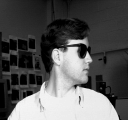

In [29]:
imagenes = [cv.imread(imagen,-1) for imagen in files] #Se cargan las imágenes y se guardan en una lista
cv2_imshow(imagenes[100])



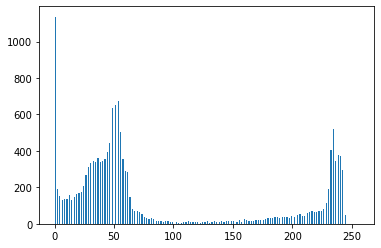

In [65]:
from matplotlib import pyplot as plt
#hist = cv.calcHist(imagenes[100],[0],None,[256],[0,256])
#plt.figure()
#plt.plot(hist)
#plt.xlim([0,256])
#plt.show()
plt.hist(imagenes[100].ravel(),256,[0,256])
plt.show()

Segmentación de las imágenes
Se aplica la tecnica de umbral, donde dado un valor limite, los valores menores se cambian a 0 y los mayores a 255, por lo que queda una imagen binarizada. Util para resaltar caracteristicas de las imágenes.

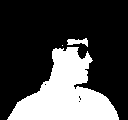

In [73]:
threshold_images = []

for imagen in imagenes:
  T,sal = cv.threshold(imagen,100,255,cv.THRESH_BINARY)
  threshold_images.append(sal)

cv2_imshow(threshold_images[100])
